#Fast Fourier Transform

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random 
import timeit
import scipy.fftpack

#Speed Test
Difference in Calculation Delay of Fast & Conventional Fourier *Transform*

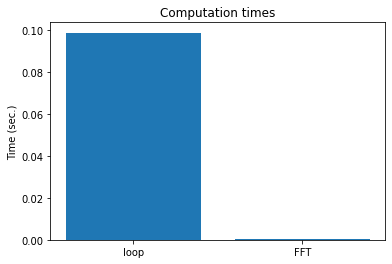

In [2]:
# create the signal
pnts   = 1000
signal = np.random.randn(pnts)


# start the timer for "slow" Fourier transform
tic = timeit.default_timer()

# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )


# end timer for slow Fourier transform
toc = timeit.default_timer()
t1 = toc-tic


# time the fast Fourier transform
tic = timeit.default_timer()
fCoefsF = scipy.fftpack.fft(signal)
toc = timeit.default_timer()
t2 = toc-tic

# and plot
plt.bar([1,2],[t1,t2])
plt.title('Computation times')
plt.ylabel('Time (sec.)')
plt.xticks([1,2], ['loop','FFT'])
plt.show()


Without Normalization

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


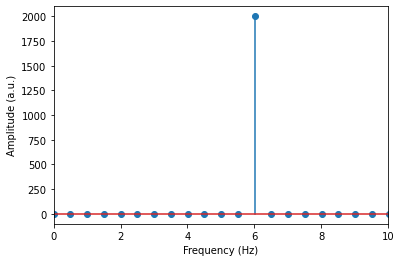

In [3]:
## fft still need normalizations

srate = 1000
time  = np.arange(0,2,1/srate)
npnts = len(time)

# signal
signal = 2*np.sin(2*np.pi*6*time)

# Fourier spectrum
signalX = scipy.fftpack.fft(signal)
hz = np.linspace(0,srate,npnts)

# amplitude
ampl = np.abs(signalX[0:len(hz)])

plt.stem(hz,ampl)
plt.xlim(0,10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')
plt.show()

Error

With Normalizations

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


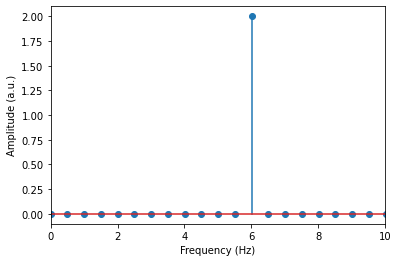

In [4]:
srate = 1000
time  = np.arange(0,2,1/srate)
npnts = len(time)

# signal
signal = 2*np.sin(2*np.pi*6*time)

# Fourier spectrum
signalX = scipy.fftpack.fft(signal)/npnts #Normalization 1: Divide by number of Points
hz = np.linspace(0,srate,npnts)


# amplitude
ampl = 2*np.abs(signalX[0:len(hz)]) #Normalization 2: Doubling
#Used Shortcut by direct multiplication as DC component is zero

plt.stem(hz,ampl)
plt.xlim(0,10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')
plt.show()